<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-_Fase3_Python/blob/rama-mateo/KMeans_Equipo_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar el modulo sklearn
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
# Leemos el archivo con los datos procesados que se obtuvieron de la limpieza
raw = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-_Fase3_Python/rama-mateo/RNPEDFC_Final.csv', encoding='ISO-8859-1')

# Guardamos los datos en formato CSV para leerlos con la librería pandas y crear un DataFrame
raw.to_csv('RNPEDFC.csv', index=False, encoding='ISO-8859-1')
df = pd.read_csv('RNPEDFC.csv', encoding='ISO-8859-1')
df.head()

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.1,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.1,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.1,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico


In [ ]:
# Eliminar las columnas que no son de interés para entrenar al modelo
df = df.drop(columns=['anio', 'fecha', 'hora', 'dias_desaparecido', 'municipio', 'localidad', 'coordenadas', 'nacionalidad', 'senas_particulares', 'discapacidad', 'dependecia_origen'])
df.head()

,entidad,sexo,edad,estatura,complexion
0,Sonora,Mujer,7,1.1,Delgada
1,Estado De Mexico,Mujer,4,1.1,Delgada
2,Estado De Mexico,Hombre,6,1.1,Delgada
3,Estado De Mexico,Hombre,10,1.1,Delgada
4,Estado De Mexico,Hombre,4,1.1,Delgada


In [ ]:
# Identificar los valores posibles de la variable 'sexo'
df['sexo'].unique()
# Sustituir los valores dicotómicos Mujer, Hombre por un valor numérico 0 y 1 respectivamente
df['sexo'] = df['sexo'].apply(lambda x: 0 if x == 'Mujer' else 1)

# Obtener un listado de los valores únicos para la columna complexión
complexiones = df['complexion'].unique()
# Generar una secuencia de números con la misma cantidad de valores que el listado, un diccionario con esa secuencia y los valores únicos de la complexión 
indices = list(range(1, len(complexiones)+1))
complexiones_dic = dict(zip(indices, complexiones))
# Reemplazar las etiquetas de complexión por los valores númericos del diccionario (el índice)
df['complexion'] = df['complexion'].replace(complexiones, indices)

# Obtener un listado de los valores únicos para la columna entidad
entidades = df['entidad'].unique()
# Generar una secuencia de números con la misma cantidad de valores que el listado, un diccionario con esa secuencia y los valores únicos de la entidad 
indices = list(range(1, len(entidades)+1))
entidades_dic = dict(zip(indices, entidades))
# Reemplazar las etiquetas de entidad por los valores númericos del diccionario (el índice)
df['entidad'] = df['entidad'].replace(entidades, indices)

# Visualizar la cabecera del dataframe resultante
df.head()


,entidad,sexo,edad,estatura,complexion
0,1,0,7,1.1,1
1,2,0,4,1.1,1
2,2,1,6,1.1,1
3,2,1,10,1.1,1
4,2,1,4,1.1,1


In [ ]:
X = np.array(df[['entidad','sexo','edad','estatura','complexion']])
X.shape

(35901, 5)

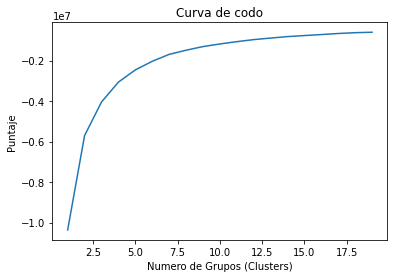

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Grupos (Clusters)')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

Se observa que la curva de codo es suave, y aunque no se encuentre un "punto de codo" muy evidente, podemos tomar un valor de entre 5 y 7.  

In [ ]:
# Correr KMeans para encontrar 5 clusters 
kmeans = KMeans(n_clusters=5).fit(X)
clusters = kmeans.predict(X)

In [ ]:
# Creamos una copia del dataframe con una columna que indica el cluster al que K-Means le asigno a cada registro
df2 =  pd.DataFrame()
df2['entidad'] = df['entidad'].values
df2['sexo'] = df['sexo'].values
df2['edad'] = df['edad'].values
df2['estatura'] = df['estatura'].values
df2['complexion'] = df['complexion'].values
df2['cluster'] = clusters;
df2

,entidad,sexo,edad,estatura,complexion,cluster
0,1,0,7,1.10,1,4
1,2,0,4,1.10,1,4
2,2,1,6,1.10,1,4
3,2,1,10,1.10,1,4
4,2,1,4,1.10,1,4
...,...,...,...,...,...,...
35896,19,1,22,1.60,1,0
35897,5,0,27,1.70,2,2
35898,19,0,86,1.77,3,3
35899,5,1,41,1.76,2,2


In [ ]:
#Describir el grupo 0
grupo_0 = pd.DataFrame()
grupo_0 = df2.loc[(df2['cluster'] == 0)]
sexo = grupo_0['sexo'].value_counts()
mujeres = sexo[0]
hombres = sexo[1]
grupo_0 = grupo_0.replace({'entidad': entidades_dic})
entidades_g0 = grupo_0['entidad']
print("### Grupo 0: ###")
print("Cantidad de personas: " +  str(len(grupo_0)))
print("Edad promedio: " +  str(np.mean(grupo_0['edad'])))
print("Estatura promedio: " +  str(np.mean(grupo_0['estatura'])))
print("Número de mujeres: " +  str(mujeres))
print("Número de hombres: " +  str(hombres))
print("Número de personas de este grupo por entidad: ")
entidades_g0.value_counts()

### Grupo 0: ###
Cantidad de personas: 10099
Edad promedio: 23.487969105852066
Estatura promedio: 1.6374621249628676
Número de mujeres: 3191
Número de hombres: 6908
Número de personas de este grupo por entidad: 


Tamaulipas              4351
Puebla                  1282
Coahuila De Zaragoza    1062
Guerrero                 966
Michoacan                762
Ciudad De Mexico         423
Veracruz                 352
Baja California          196
Oaxaca                   153
Nayarit                  107
Aguascalientes            96
Chiapas                   84
San Luis Potosi           67
Tabasco                   56
Quintana Roo              50
Yucatan                   49
Campeche                  20
Zacatecas                 14
Baja California Sur        9
Name: entidad, dtype: int64

### Grupo 0: ###
Cantidad de personas: 10099
Edad promedio: 23.487969105852066
Estatura promedio: 1.6374621249628676
Número de mujeres: 3191
Número de hombres: 6908
Número de personas de este grupo por entidad: 


Tamaulipas              4351
Puebla                  1282
Coahuila De Zaragoza    1062
Guerrero                 966
Michoacan                762
Ciudad De Mexico         423
Veracruz                 352
Baja California          196
Oaxaca                   153
Nayarit                  107
Aguascalientes            96
Chiapas                   84
San Luis Potosi           67
Tabasco                   56
Quintana Roo              50
Yucatan                   49
Campeche                  20
Zacatecas                 14
Baja California Sur        9
Name: entidad, dtype: int64

In [ ]:
#Describir el grupo 1
grupo_1 = pd.DataFrame()
grupo_1 = df2.loc[(df2['cluster'] == 1)]
sexo = grupo_1['sexo'].value_counts()
mujeres = sexo[0]
hombres = sexo[1]
grupo_1 = grupo_1.replace({'entidad': entidades_dic})
entidades_g1 = grupo_1['entidad']
print("### Grupo 1: ###")
print("Cantidad de personas: " +  str(len(grupo_1)))
print("Edad promedio: " +  str(np.mean(grupo_1['edad'])))
print("Estatura promedio: " +  str(np.mean(grupo_1['estatura'])))
print("Número de mujeres: " +  str(mujeres))
print("Número de hombres: " +  str(hombres))
print("Número de personas de este grupo por entidad: ")
entidades_g1.value_counts()

### Grupo 1: ###
Cantidad de personas: 5323
Edad promedio: 43.27991733984595
Estatura promedio: 1.6692992673304528
Número de mujeres: 726
Número de hombres: 4597
Número de personas de este grupo por entidad: 


Tamaulipas              1436
Jalisco                  663
Coahuila De Zaragoza     559
Guerrero                 429
Puebla                   390
Michoacan                381
Nuevo Leon               343
Sinaloa                  300
Ciudad De Mexico         179
Baja California          145
Veracruz                 141
Zacatecas                 67
Guanajuato                45
Aguascalientes            37
Nayarit                   31
Yucatan                   30
Oaxaca                    24
Queretaro                 23
Chiapas                   22
San Luis Potosi           21
Durango                   18
Tabasco                    9
Quintana Roo               9
Campeche                   9
Baja California Sur        7
Hidalgo                    4
Morelos                    1
Name: entidad, dtype: int64

In [ ]:
#Describir el grupo 2
grupo_2 = pd.DataFrame()
grupo_2 = df2.loc[(df2['cluster'] == 2)]
sexo = grupo_2['sexo'].value_counts()
mujeres = sexo[0]
hombres = sexo[1]
grupo_2 = grupo_2.replace({'entidad': entidades_dic})
entidades_g2 = grupo_2['entidad']
print("### Grupo 2: ###")
print("Cantidad de personas: " +  str(len(grupo_2)))
print("Edad promedio: " +  str(np.mean(grupo_2['edad'])))
print("Estatura promedio: " +  str(np.mean(grupo_2['estatura'])))
print("Número de mujeres: " +  str(mujeres))
print("Número de hombres: " +  str(hombres))
print("Número de personas de este grupo por entidad: ")
entidades_g2.value_counts()

### Grupo 2: ###
Cantidad de personas: 9263
Edad promedio: 33.294828889128794
Estatura promedio: 1.668039512037137
Número de mujeres: 1453
Número de hombres: 7810
Número de personas de este grupo por entidad: 


Sinaloa                1505
Jalisco                1454
Estado De Mexico       1374
Nuevo Leon             1278
Sonora                 1127
Chihuahua              1072
Guanajuato              313
Colima                  282
Durango                 233
Zacatecas               230
Queretaro               115
Morelos                  98
Baja California          83
Hidalgo                  54
Baja California Sur      17
Aguascalientes           12
Tlaxcala                 10
San Luis Potosi           6
Name: entidad, dtype: int64

In [ ]:
#Describir el grupo 3
grupo_3 = pd.DataFrame()
grupo_3 = df2.loc[(df2['cluster'] == 3)]
sexo = grupo_3['sexo'].value_counts()
mujeres = sexo[0]
hombres = sexo[1]
grupo_3 = grupo_3.replace({'entidad': entidades_dic})
entidades_g3 = grupo_3['entidad']
print("### Grupo 3: ###")
print("Cantidad de personas: " +  str(len(grupo_3)))
print("Edad promedio: " +  str(np.mean(grupo_3['edad'])))
print("Estatura promedio: " +  str(np.mean(grupo_3['estatura'])))
print("Número de mujeres: " +  str(mujeres))
print("Número de hombres: " +  str(hombres))
print("Número de personas de este grupo por entidad: ")
entidades_g3.value_counts()

### Grupo 3: ###
Cantidad de personas: 2754
Edad promedio: 63.82752360203341
Estatura promedio: 1.6478104575163397
Número de mujeres: 368
Número de hombres: 2386
Número de personas de este grupo por entidad: 


Estado De Mexico        494
Chihuahua               292
Jalisco                 260
Nuevo Leon              253
Tamaulipas              200
Puebla                  198
Sonora                  194
Sinaloa                 192
Ciudad De Mexico        125
Coahuila De Zaragoza     91
Michoacan                64
Guanajuato               61
Baja California          50
Guerrero                 43
Colima                   39
Zacatecas                39
Queretaro                34
Durango                  30
Yucatan                  20
Veracruz                 20
Morelos                  17
Hidalgo                   8
Aguascalientes            8
Oaxaca                    5
Tlaxcala                  5
Campeche                  3
Quintana Roo              2
Baja California Sur       2
Tabasco                   2
Chiapas                   2
San Luis Potosi           1
Name: entidad, dtype: int64

In [ ]:
#Describir el grupo 4
grupo_4 = pd.DataFrame()
grupo_4 = df2.loc[(df2['cluster'] == 4)]
sexo = grupo_4['sexo'].value_counts()
mujeres = sexo[0]
hombres = sexo[1]
grupo_4 = grupo_4.replace({'entidad': entidades_dic})
entidades_g4 = grupo_4['entidad']
print("### Grupo 4: ###")
print("Cantidad de personas: " +  str(len(grupo_4)))
print("Edad promedio: " +  str(np.mean(grupo_4['edad'])))
print("Estatura promedio: " +  str(np.mean(grupo_4['estatura'])))
print("Número de mujeres: " +  str(mujeres))
print("Número de hombres: " +  str(hombres))
print("Número de personas de este grupo por entidad: ")
entidades_g4.value_counts()

### Grupo 4: ###
Cantidad de personas: 8462
Edad promedio: 17.13519262585677
Estatura promedio: 1.5875194989364216
Número de mujeres: 3488
Número de hombres: 4974
Número de personas de este grupo por entidad: 


Estado De Mexico        2022
Sinaloa                 1026
Nuevo Leon              1021
Jalisco                  984
Sonora                   829
Chihuahua                817
Baja California          391
Colima                   271
Puebla                   196
Guanajuato               196
Zacatecas                160
Durango                  134
Morelos                  123
Queretaro                111
Hidalgo                   79
Aguascalientes            69
Tlaxcala                   9
Oaxaca                     8
Veracruz                   7
Baja California Sur        4
Coahuila De Zaragoza       2
Campeche                   2
San Luis Potosi            1
Name: entidad, dtype: int64

In [ ]:
# Ejemplos revisados:
# *** https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
# https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/#Ejemplo_de_Clustering_K-Means_en_Python
# https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html
